# Customer Churn Analysis

This notebook performs basic churn prediction using logistic regression on the Telco customer churn dataset.

Steps:
- Load and preview data
- Data preprocessing
- Train/test split
- Model training
- Evaluation
- Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("E:/PythonProjects/PA-Projects/Customer_Churn_Analysis/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check churn distribution

In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Convert churn to numeric

In [4]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df[['Churn']].head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Feature selection

In [5]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

## Train/test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train logistic regression model

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Predict and evaluate

In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113



## Visualize churn vs tenure

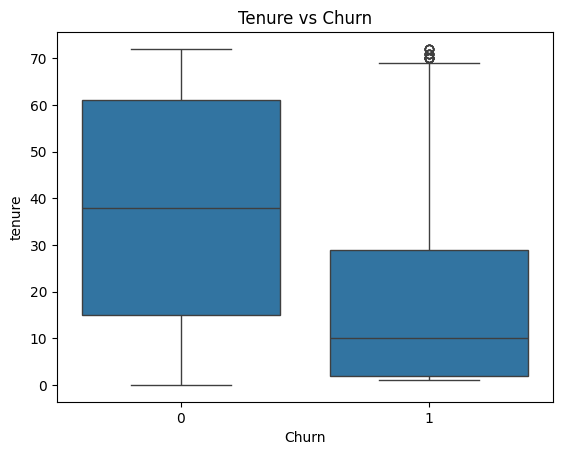

In [9]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.savefig('results/tenure_vs_churn.png', dpi=300)
plt.show()